In [2]:
import os
import zipfile
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from shutil import copyfile
from os import getcwd

In [3]:
path_cats_and_dogs = f"{getcwd()}/tmp/cats-and-dogs.zip"

local_zip = path_cats_and_dogs
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./tmp')
zip_ref.close()

In [4]:
print(len(os.listdir('./tmp/PetImages/Cat/')))
print(len(os.listdir('./tmp/PetImages/Dog/')))

1500
1500


In [5]:
to_create = [
    './cats-v-dogs',
    './cats-v-dogs/training',
    './cats-v-dogs/testing',
    './cats-v-dogs/training/cats',
    './cats-v-dogs/training/dogs',
    './cats-v-dogs/testing/cats',
    './cats-v-dogs/testing/dogs'
]

for directory in to_create:
    try:
        os.mkdir(directory)
        print(directory, 'created')
    except:
        print(directory, 'failed')

./cats-v-dogs created
./cats-v-dogs/training created
./cats-v-dogs/testing created
./cats-v-dogs/training/cats created
./cats-v-dogs/training/dogs created
./cats-v-dogs/testing/cats created
./cats-v-dogs/testing/dogs created


In [6]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    images = os.listdir(SOURCE)

    TRAIN = random.sample(images, int(SPLIT_SIZE * len(images)))
    for file in TRAIN:
        path = SOURCE+file
        if os.path.getsize(path) > 0:
            copyfile(path, TRAINING+file)
        else:
            print(f'{path} is zero length, so ignoring')
    
    TEST = list(set(images) - set(TRAIN))
    for file in TEST:
        path = SOURCE+file
        if os.path.getsize(path) > 0:
            copyfile(path, TESTING+file)
        else:
            print(f'{path} is zero length, so ignoring')



CAT_SOURCE_DIR = "./tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "./cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "./cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "./tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "./cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "./cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

In [7]:
print(len(os.listdir(TRAINING_CATS_DIR)))
print(len(os.listdir(TRAINING_DOGS_DIR)))
print(len(os.listdir(TESTING_CATS_DIR)))
print(len(os.listdir(TESTING_DOGS_DIR)))

1350
1350
150
150


In [8]:
model = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'),
    MaxPool2D(2,2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D(2,2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
    
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [10]:
TRAINING_DIR = "./cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale= 1.0/255.0)

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE 
# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                   batch_size=10,
                                                   class_mode='binary',
                                                   target_size=(150,150))

VALIDATION_DIR = "./cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale= 1.0/255.0)

# NOTE: YOU MUST USE A BACTH SIZE OF 10 (batch_size=10) FOR THE 
# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, 
                                                   batch_size=10,
                                                   class_mode='binary',
                                                   target_size=(150,150))



# Expected Output:
# Found 2700 images belonging to 2 classes.
# Found 300 images belonging to 2 classes.

Found 2700 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [11]:
history = model.fit(train_generator,
                    epochs=10, 
                    verbose=1,
                    validation_data=validation_generator)

Epoch 1/10
270/270 [==============================] - 43s 48ms/step - loss: 0.7570 - acc: 0.5789 - val_loss: 0.5923 - val_acc: 0.7000
Epoch 2/10
270/270 [==============================] - 12s 44ms/step - loss: 0.6041 - acc: 0.6856 - val_loss: 0.6619 - val_acc: 0.6933
Epoch 3/10
270/270 [==============================] - 12s 43ms/step - loss: 0.5427 - acc: 0.7459 - val_loss: 0.4904 - val_acc: 0.7600
Epoch 4/10
270/270 [==============================] - 12s 44ms/step - loss: 0.4966 - acc: 0.7544 - val_loss: 0.5141 - val_acc: 0.7467
Epoch 5/10
270/270 [==============================] - 12s 43ms/step - loss: 0.4443 - acc: 0.7911 - val_loss: 0.5560 - val_acc: 0.7500
Epoch 6/10
270/270 [==============================] - 12s 43ms/step - loss: 0.3802 - acc: 0.8337 - val_loss: 0.7270 - val_acc: 0.7000
Epoch 7/10
270/270 [==============================] - 12s 44ms/step - loss: 0.3268 - acc: 0.8630 - val_loss: 0.5648 - val_acc: 0.7167
Epoch 8/10
270/270 [==============================] - 12s 44ms

Text(0.5, 1.0, 'Training and validation loss')

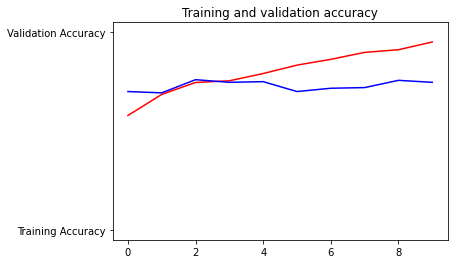

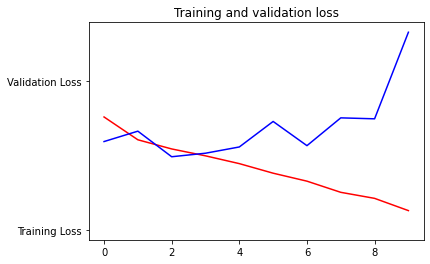

In [13]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [14]:
import numpy as np
from keras.preprocessing import image
import os

images = os.listdir("./tmp/images")

print(images)

for i in images:
 print()
 # predicting images
 path = './tmp/images/' + i
 img = image.load_img(path, target_size=(150, 150))
 x = image.img_to_array(img)
 x = np.expand_dims(x, axis=0)

 images = np.vstack([x])
 classes = model.predict(images, batch_size=10)
 print(classes[0])
 if classes[0]>0.5:
   print(i + " is a dog")
 else:
   print(i + " is a cat")

['Himalayan-chocolate-point.jpg', '322868_1100-800x825.jpg', 'gettyimages-171117216_web.jpg', 'orange-tabby-kitten-walking-across-floor.jpg', '1800x1200_cat_relaxing_on_patio_other.jpg', '3408.jpg']

[0.]
Himalayan-chocolate-point.jpg is a cat

[1.]
322868_1100-800x825.jpg is a dog

[1.]
gettyimages-171117216_web.jpg is a dog

[0.]
orange-tabby-kitten-walking-across-floor.jpg is a cat

[0.]
1800x1200_cat_relaxing_on_patio_other.jpg is a cat

[1.]
3408.jpg is a dog
